# Assignment    --- Due 11:59pm, Wednesday, April 21, 2021

### You need to submit both this notebook and a "Result.txt" file as instructed in the questions.

##  A Comparison of Two Speeches 

In this exercise we will conduct a step-by-step analysis and comparison of two speeches -- the State of Union Address of President Obama and that of President Trump. Some of the questions are designed to be open-ended to encourage data science thinking and your own creativity in problem solving. 

#### You need to provide Python code for all the questions in this notebook with proper naming for functions, pseudo-codes or comments for easy understanding.  All result output will be stored in a file called "Result.txt" under different sections, which will be submitted together with this notebook for this assignment.

Preparing `Result.txt` file for the answer.

In [2]:
with open('Result.txt', 'w') as file:
    file.write("ISSS617 - Python For Data Science: Assignment\n")
    file.write("Name: Yejin Son\n")
    file.write("Email: yejin.son.2019@mitb.smu.edu.sg")
    file.write("Submitted on: 25th April, 2021")


### Q.1  A First Profiling (20 marks)

Import the text data files ”StateOfUnion_Obama.txt" and ”StateOfUnion_Trump.txt". Compare the two speeches by the following metrics. You should plot out the metrics in an appropriate way for comparison when possible. 

(1) Number of distinct words

(2) Length of words

(3) Length of sentences

(4) Number and frequency of applause 

(5) Number of country names mentioned

Print out the comparison results and store this information in a section called "A First Profile" in the "Result.txt" file.  Exlain and justify your solution when necessary.

In [4]:
#Import required libraries
import re
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import nltk
import gensim
import pycountry as pc

#Load required files for the assignment
obama_file = open('StateOfUnion_Obama.txt', "r")
trump_file = open('StateOfUnion_Trump.txt', "r")

obama_txt = obama_file.read()
trump_txt = trump_file.read()

(1) Number of distinct words

As it is first profiling without any pre-processing of data, there will only be basic level of sanity check for counting distinct words. The function `get_num_distinct_words` will only count words that only contain alphanumeric value.

In [5]:
obama_words = obama_txt.split()
trump_words = trump_txt.split()

# Returns number of distinct words in each input text
def get_num_distinct_words(text):
    wordcount = {}
    for word in text:
        # do not count if the word does not have any alphanumeric value
        # (e.g. it will remove '--' from the text)
        if any(c.isalnum() for c in word):
            wordcount[word] = wordcount.get(word, 0) + 1
    return len(wordcount)


obama_num_distinct = get_num_distinct_words(obama_words)
trump_num_distinct = get_num_distinct_words(trump_words)

print("Obama: ", obama_num_distinct, "\nTrump: ", trump_num_distinct)

Obama:  2033 
Trump:  2307


Save the result into the result file.

In [11]:
with open('Result.txt', 'a') as file:
    file.write("\n\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("######################A First Profile######################\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("\n(1) Number of distinct words\n")
    file.write("Obama Speech: %s distinct words\n" % obama_num_distinct)
    file.write("Trump Speech: %s distinct words" % trump_num_distinct)
    file.write("\n\n")

Before going to the next question, we will get a basic information by creating data frame with each word's frequency.

In [13]:
# For the future usage, get frequency of each words in dictionary format.
# Returns dictionary of words with freqeuncy for input text
def get_word_freq(text):
    wordcount = {}
    for word in text:
        if any(c.isalnum() for c in word):
            wordcount[word] = wordcount.get(word, 0) + 1
    return wordcount

obama_word_freq = get_word_freq(obama_words)
obama_word_freq = sorted(obama_word_freq.items(), key=lambda x:x[1], reverse = True)
df_obama = pd.DataFrame(obama_word_freq, columns=['word','frequency'])

trump_word_freq = get_word_freq(trump_words)
trump_word_freq = sorted(trump_word_freq.items(), key=lambda x:x[1], reverse = True)
df_trump = pd.DataFrame(trump_word_freq, columns=['word','frequency'])
print(df_obama.head(20),"\n\n")
print(df_trump.head(20))

           word  frequency
0           the        273
1            to        203
2            of        149
3           and        142
4             a        117
5          that        115
6            we        100
7            in         99
8           our         83
9   (Applause.)         79
10           is         68
11          for         53
12            I         51
13           or         50
14          And         49
15          who         40
16           on         37
17          not         37
18         have         36
19           it         35 


           word  frequency
0           the        264
1           and        199
2            to        158
3            of        149
4   (Applause.)        124
5            is         98
6            in         98
7             a         92
8           our         79
9            we         64
10          are         64
11          for         60
12         that         60
13         have         51
14            I         5

(2) Length of words

It will be interesting to compare how often each leader use certain length of words. Length of words do not represent any complexity or proficiency of speech, but it can be a personal tendency when it comes to speech. The function `word_length_freq` returns frequency of each string with same length in the input text.

In [14]:
# Returns frequency of each word length
def word_length_freq(text):
    wordcount = {}
    for word in text:
        if any(c.isalnum() for c in word):
            wordcount[len(word)] = wordcount.get(len(word), 0) + 1
    wordcount = collections.OrderedDict(sorted(wordcount.items(), key=lambda x:x[1], reverse=True))
    return wordcount

obama_length = word_length_freq(obama_words)
trump_length = word_length_freq(trump_words)

#Print answer
print(obama_length)
print(trump_length)

OrderedDict([(3, 1168), (4, 1094), (2, 1032), (5, 618), (6, 561), (7, 491), (8, 315), (9, 225), (1, 171), (10, 169), (11, 163), (12, 32), (13, 20), (14, 5), (15, 3), (17, 2), (16, 1), (32, 1), (23, 1), (18, 1), (27, 1), (20, 1)])
OrderedDict([(3, 1182), (4, 1037), (2, 922), (5, 696), (6, 551), (7, 545), (8, 476), (9, 313), (11, 217), (1, 191), (10, 166), (12, 66), (13, 27), (14, 20), (15, 11), (16, 4), (18, 3)])


Generate a comparison plot between two figures

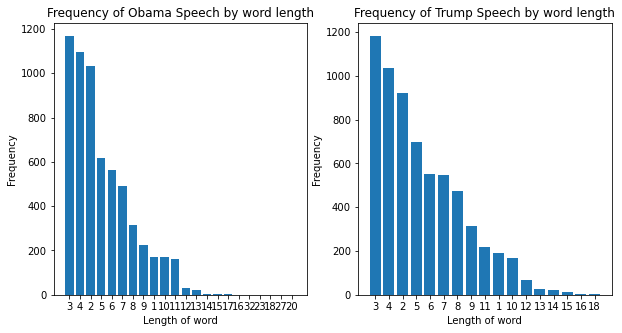

In [21]:
plt.subplots(2,2,figsize = (10,5))
plt.subplot(1,2,1)
plt.bar(range(len(obama_length)), list(obama_length.values()), align = 'center')
plt.xticks(range(len(obama_length)), list(obama_length.keys()))
plt.title('Frequency of Obama Speech by word length')
plt.xlabel('Length of word')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.bar(range(len(trump_length)), list(trump_length.values()), align = 'center')
plt.xticks(range(len(trump_length)), list(trump_length.keys()))
plt.title('Frequency of Trump Speech by word length')
plt.xlabel('Length of word')
plt.ylabel('Frequency')
plt.show()

Save the result into the result file.

In [37]:
ans2_1 = pd.DataFrame.from_dict(dict(obama_length), orient = 'index')
ans2_1.columns = ['Frequency']
ans2_2 = pd.DataFrame.from_dict(dict(trump_length), orient='index')
ans2_2.columns = ['Frequency']

with open('Result.txt', 'a') as file:
    file.write("\n(2) Length of words\n")
    file.write("The result is sorted by frequency in descending order\n")
    file.write("Obama Speech - Frequency by length of words\n")
    file.write(str(ans2_1))
    file.write("\n\nTrump Speech - Frequency by length of words\n")
    file.write(str(ans2_2))
    file.write("\n\n")

(3) Length of sentences

In [38]:
obama_sent = nltk.tokenize.sent_tokenize(obama_txt)
trump_sent = nltk.tokenize.sent_tokenize(trump_txt)

obama_len_sentence = [len(sentence) for sentence in obama_sent]
trump_len_sentence = [len(sentence) for sentence in trump_sent]

print(sorted(obama_len_sentence, reverse=True))
print(sorted(trump_len_sentence, reverse=True))

#compare two results
print("Obama Speech's minimum length of sentence is: ", min(obama_len_sentence))
print("Obama Speech's maximum length of sentence is: ", max(obama_len_sentence))
print("Trump Speech's minimum length of sentence is: ", min(trump_len_sentence))
print("Trump Speech's maximum length of sentence is: ", max(trump_len_sentence))

[481, 377, 361, 349, 336, 296, 272, 264, 260, 256, 253, 249, 240, 238, 236, 229, 225, 225, 223, 223, 222, 220, 219, 218, 217, 215, 215, 214, 210, 209, 204, 200, 199, 199, 196, 194, 192, 188, 185, 183, 183, 183, 181, 181, 181, 180, 179, 179, 175, 174, 173, 173, 171, 170, 168, 167, 165, 164, 164, 163, 163, 160, 158, 158, 157, 155, 155, 154, 154, 154, 154, 151, 149, 149, 147, 145, 143, 142, 140, 139, 138, 138, 138, 138, 137, 137, 137, 137, 136, 136, 136, 136, 135, 134, 133, 132, 132, 132, 130, 129, 129, 127, 126, 126, 126, 125, 125, 124, 123, 123, 121, 121, 118, 118, 118, 117, 116, 116, 114, 113, 113, 113, 112, 111, 111, 110, 107, 107, 106, 105, 103, 102, 102, 101, 101, 101, 100, 100, 100, 99, 97, 96, 96, 96, 96, 95, 94, 94, 92, 91, 91, 91, 90, 90, 90, 89, 89, 88, 88, 87, 87, 87, 86, 86, 86, 85, 85, 85, 85, 84, 84, 84, 83, 83, 81, 81, 81, 80, 80, 80, 79, 79, 79, 78, 77, 76, 76, 76, 75, 73, 72, 71, 71, 71, 70, 70, 70, 69, 69, 69, 69, 69, 68, 68, 66, 66, 66, 66, 66, 65, 64, 64, 63, 63, 63, 

To understand better, plot has been created to see which speaker uses more long sentences or more short sentences.

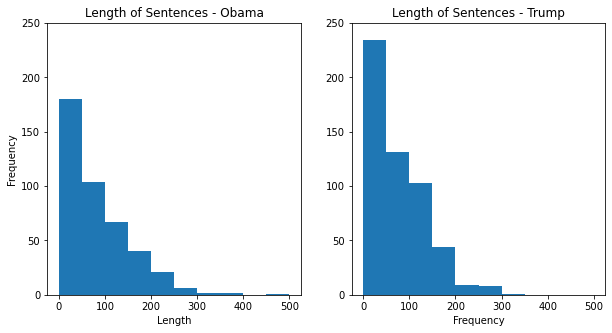

In [39]:
# create bins
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

plt.subplots(2,2, figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(obama_len_sentence, bins = bins)
plt.title('Length of Sentences - Obama')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.yticks(range(0,300,50))

plt.subplot(1,2,2)
plt.hist(trump_len_sentence, bins = bins)
plt.title('Length of Sentences - Trump')
plt.xlabel('Frequency')
plt.yticks(range(0,300,50))

plt.show()

Save the result into the file.

In [40]:
ans1_3_1 = obama_len_sentence
ans1_3_2 = trump_len_sentence

with open('Result.txt', 'a') as file:
    file.write("\n(3) Length of sentences\n")
    file.write("Length of each sentence\n")
    file.write("<Obama Speech>\n")
    file.write(str(ans1_3_1))
    file.write("\n\n<Trump Speech>\n")
    file.write(str(ans1_3_2))
    file.write("\n\nFor the further detailed analysis, please refer to the jupyter notebook results.")
    file.write("\n\n")

Obama Speech's minimum length of sentence is:  4
Obama Speech's maximum length of sentence is:  481
Trump Speech's minimum length of sentence is:  5
Trump Speech's maximum length of sentence is:  330


(4) Number and frequency of applause

For this question, you can use regex to count numbers of applause appearing in each speech.

In [42]:
def count_applause(text):
    pattern = re.compile(r'\b\w*(applause|Applause)\w*\b')
    count = 0
    for word in text:
        if re.search(pattern, word):
            count += 1
    return count

print(count_applause(obama_words))
print(count_applause(trump_words))

89
132


Saving result into result file.

In [44]:
ans1_4_1 = count_applause(obama_words)
ans1_4_2 = count_applause(trump_words)

with open('Result.txt', 'a') as file:
    file.write("\n(4) Number and frequency of applause\n")
    file.write("Obama Speech: %s \n" % str(ans1_4_1))
    file.write("Trump Speech: %s \n" % str(ans1_4_2))
    file.write("\n\n")

(5) Number of country names mentioned

Firstly, check what kind of countries are mentioned from the speech by using `pycountry` module.

In [46]:
obama_countries = []
trump_countries = []

for country in pc.countries:
    if country.name in obama_txt:
        obama_countries.append(country.name)
    if country.name in trump_txt:
        trump_countries.append(country.name)

print(obama_countries)
print(trump_countries)

country_list = obama_countries
for country in trump_countries:
    if country not in country_list:
        country_list.append(country)
country_list.append("America") #Handling exception

print(country_list)

['Afghanistan', 'China', 'Colombia', 'Cuba', 'Iraq', 'Pakistan', 'Ukraine', 'United States', 'Yemen']
['Afghanistan', 'Canada', 'China', 'Cuba', 'Guatemala', 'Honduras', 'Iraq', 'Israel', 'Mexico', 'Nicaragua', 'El Salvador', 'United States']
['Afghanistan', 'China', 'Colombia', 'Cuba', 'Iraq', 'Pakistan', 'Ukraine', 'United States', 'Yemen', 'Canada', 'Guatemala', 'Honduras', 'Israel', 'Mexico', 'Nicaragua', 'El Salvador', 'America']


From the `country list`, count how many times of each country name mentioned by speech.

In [47]:
combined = "(" + ")|(".join(country_list) + ")"
combined = "r'\b"+combined

obama_country_mentioned = re.findall(combined, obama_txt)
trump_country_mentioned = re.findall(combined, trump_txt)

#Print out result
print(len(obama_country_mentioned))
print(len(trump_country_mentioned))

84
126


Saving result into result file.

In [50]:
ans1_5_1 = len(obama_country_mentioned)
ans1_5_2 = len(trump_country_mentioned)

with open('Result.txt', 'a') as file:
    file.write("\n(5) Number of country names mentioned\n")
    file.write("List of Countries mentioned: %s \n" % str(country_list))
    file.write("Obama Speech: %s \n" % str(ans1_5_1))
    file.write("Trump Speech: %s \n" % str(ans1_5_2))
    file.write("\n\n")

### Q.2  Data Pre-processing  (20 marks)

Remove three categories of words --- stop words, common words and rare words --- from the text.  Print out the top-100 words you remove for each categories along with the number of each word removed and store these information in a section called "Processing Log" in the "Result.txt" file.  Exlain and justify your solution when necessary. 


In [51]:
# due to encoding problem, we will encode each text
# use gensim tokenize module to tokenize
obama_tokens = list(gensim.utils.tokenize(obama_txt.encode()))
trump_tokens = list(gensim.utils.tokenize(trump_txt.encode()))

Once each text is tokenized, we should change all words to lower case for easier analysis.

In [52]:
# Change all words to lower case
obama_lower = [w.lower() for w in obama_tokens]
trump_lower = [w.lower() for w in trump_tokens]

Now `obama_lower` and `trump_lower` are ready for further pre-processing. Firstly, we would like to check all the stopwords. For easier process, Gensim package's stopwords set was used to generate list of stop words that are commonly used without contributing much value to the actual meaning of the sentence.

In [53]:
# Stop words, Common words removal
stop_list = gensim.parsing.preprocessing.STOPWORDS
print(stop_list)

obama_stopwords = [w for w in obama_lower if w in stop_list]
trump_stopwords = [w for w in trump_lower if w in stop_list]

obama_stopword_freq = sorted(get_word_freq(obama_stopwords).items(), key=lambda x:x[1], reverse = True)
trump_stopword_freq = sorted(get_word_freq(trump_stopwords).items(), key=lambda x:x[1], reverse = True)

print(obama_stopword_freq[:100])
print(trump_stopword_freq[:100])

frozenset({'while', 'towards', 'twelve', 'by', 'ten', 'however', 'him', 'from', 'because', 'ours', 'and', 'then', 'seemed', 'what', 'none', 'enough', 'hundred', 'three', 'formerly', 'eleven', 'some', 'we', 'doing', 'although', 'made', 'put', 'here', 'very', 'be', 'through', 'do', 'onto', 'nobody', 'at', 'often', 'around', 'otherwise', 'wherein', 'these', 'with', 'only', 'am', 'bottom', 'make', 'whereafter', 'someone', 'off', 'yet', 'co', 'has', 'where', 'somewhere', 'now', 'under', 'others', 'just', 'nor', 'indeed', 'inc', 'noone', 'found', 'why', 'mostly', 'least', 'together', 'one', 'himself', 'due', 'hence', 'us', 'own', 'take', 'against', 'should', 'is', 'still', 'un', 'whenever', 'yourselves', 'everything', 'for', 'please', 'didn', 'therein', 'thick', 'eight', 'again', 'thence', 'that', 'sometime', 'down', 'neither', 'either', 'whether', 'had', 'regarding', 'using', 'into', 'besides', 'system', 'become', 'sincere', 'done', 'no', 'somehow', 'are', 'them', 'does', 'bill', 'they', 'g

On top of removing stop words, check out top 100 common words that can be potentially removed for further analysis.

In [54]:
obama_common_words = collections.Counter(obama_lower).most_common(100)
trump_common_words = collections.Counter(trump_lower).most_common(100)

print(obama_common_words)
print(trump_common_words)

[('the', 285), ('to', 208), ('and', 192), ('of', 150), ('that', 130), ('we', 122), ('a', 119), ('in', 104), ('our', 91), ('applause', 89), ('is', 72), ('it', 69), ('for', 59), ('i', 57), ('or', 51), ('on', 41), ('this', 40), ('who', 40), ('not', 40), ('but', 38), ('have', 36), ('as', 35), ('us', 34), ('are', 29), ('you', 28), ('america', 28), ('people', 27), ('their', 27), ('will', 26), ('they', 26), ('be', 25), ('just', 25), ('thatõs', 25), ('s', 25), ('world', 24), ('with', 24), ('when', 24), ('more', 23), ('work', 22), ('all', 22), ('do', 22), ('now', 22), ('american', 22), ('if', 21), ('so', 20), ('make', 19), ('there', 19), ('want', 19), ('itõs', 19), ('can', 19), ('new', 19), ('by', 19), ('up', 18), ('years', 18), ('even', 18), ('out', 18), ('year', 17), ('because', 17), ('change', 16), ('economy', 16), ('should', 16), ('americans', 15), ('from', 15), ('better', 15), ('need', 15), ('how', 15), ('every', 15), ('weõve', 15), ('over', 15), ('has', 14), ('see', 14), ('like', 13), ('r

Lastly, check out rare words that are used in each text.

In [55]:
obama_rare_words = collections.Counter(obama_lower).most_common()[:-100-1:-1]
trump_rare_words = collections.Counter(trump_lower).most_common()[:-100-1:-1]

print(obama_rare_words)
print(trump_rare_words)

[('thank', 1), ('confident', 1), ('hopeful', 1), ('optimistic', 1), ('challenge', 1), ('undaunted', 1), ('hearted', 1), ('eyed', 1), ('clear', 1), ('worth', 1), ('precious', 1), ('count', 1), ('polls', 1), ('volunteers', 1), ('casts', 1), ('cast', 1), ('wait', 1), ('woman', 1), ('elderly', 1), ('taught', 1), ('overrides', 1), ('whose', 1), ('father', 1), ('courage', 1), ('finds', 1), ('cheer', 1), ('lines', 1), ('marathon', 1), ('run', 1), ('till', 1), ('tends', 1), ('nurse', 1), ('keeping', 1), ('brave', 1), ('treating', 1), ('cop', 1), ('matters', 1), ('prove', 1), ('determined', 1), ('protester', 1), ('owner', 1), ('starting', 1), ('dreaming', 1), ('mistakes', 1), ('served', 1), ('disease', 1), ('someday', 1), ('teacher', 1), ('project', 1), ('finish', 1), ('late', 1), ('stays', 1), ('dreamer', 1), ('laying', 1), ('pays', 1), ('boss', 1), ('company', 1), ('shifts', 1), ('extra', 1), ('clocked', 1), ('worker', 1), ('unfolding', 1), ('citizenship', 1), ('acts', 1), ('daily', 1), ('our

Remove three categories of words --- stop words, common words and rare words --- from the text based on the result above.

In [56]:
words_to_remove = []

# a function to create a list of words to remove from above result
def append_words(current_list, dict_words):
    for w in dict_words:
        if w[0] not in current_list:
            current_list.append(w[0])
    return current_list

words_to_remove = append_words(words_to_remove, obama_stopword_freq[:100])
words_to_remove = append_words(words_to_remove, trump_stopword_freq[:100])
words_to_remove = append_words(words_to_remove, obama_common_words)
words_to_remove = append_words(words_to_remove, trump_common_words)
words_to_remove = append_words(words_to_remove, obama_rare_words)
words_to_remove = append_words(words_to_remove, trump_rare_words)

obama_cleaned = [w for w in obama_lower if w not in words_to_remove]
trump_cleaned = [w for w in trump_lower if w not in words_to_remove]

print(obama_cleaned)
print(trump_cleaned)
print(len(obama_cleaned))
print(len(trump_cleaned))

['remarks', 'barack', 'obama', 'ð', 'state', 'union', 'address', 'delivered', 'mr', 'speaker', 'mr', 'vice', 'members', 'fellow', 'marks', 'eighth', 'iõve', 'come', 'report', 'state', 'union', 'final', 'iõm', 'try', 'little', 'shorter', 'antsy', 'iowa', 'laughter', 've', 'll', 'shaking', 'hands', 'afterwards', 'tips', 'laughter', 'understand', 'election', 'season', 'expectations', 'achieve', 'low', 'mr', 'speaker', 'appreciate', 'constructive', 'approach', 'leaders', 'took', 'end', 'pass', 'budget', 'tax', 'cuts', 'permanent', 'families', 'hope', 'bipartisan', 'priorities', 'justice', 'reform', 'helping', 'battling', 'prescription', 'drug', 'abuse', 'heroin', 'abuse', 'knows', 'might', 'cynics', 'again', 'easy', 'traditional', 'list', 'proposals', 'ahead', 'donõt', 'worry', 'iõve', 'got', 'plenty', 'helping', 'students', 'learn', 'write', 'computer', 'code', 'personalizing', 'medical', 'treatments', 'patients', 'pushing', 'progress', 'needs', 'fixing', 'broken', 'immigration', 'protect

Save results into Results file.

In [60]:
ans_stopwords_o = obama_stopword_freq[:100]
ans_stopwords_t = trump_stopword_freq[:100]
ans_commonwords_o = obama_common_words
ans_commonwords_t = trump_common_words
ans_rarewords_o = obama_rare_words
ans_rarewords_t =trump_rare_words

with open('Result.txt', 'a') as file:
    file.write("\n\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("######################Processing Log######################\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("The answer appears in (word, frequency) format, sorted by descending order.\n")
    file.write("\n(1) Stop Words\n")
    file.write("<Obama Speech>\n")
    file.write("a) Top 100 Stop Words\n")
    file.write(str(ans_stopwords_o))
    file.write("\n\n\nb) Top 100 Common Words\n\n")
    file.write(str(ans_commonwords_o))
    file.write("\n\n\nc) Top 100 Rare Words\n\n")
    file.write(str(ans_rarewords_o))
    file.write("\n\n\n<Trump Speech>\n")
    file.write("a) Top 100 Stop Words\n\n")
    file.write(str(ans_stopwords_t))
    file.write("\n\n\nb) Top 100 Common Words\n\n")
    file.write(str(ans_commonwords_t))
    file.write("\n\n\nc) Top 100 Rare Words\n\n")
    file.write(str(ans_rarewords_t))
    file.write("\n\n\n\n")

### Q.3  Word Association (I)  (20 marks)

Use two ways: (1) loop structure and (2) regular expression, to find out the set of all nouns that appear immediately before or after the following words, case-insensitive. 

```
WordList = ["America","future","country","people","world"]
```

Print the two sets of nouns from the two speeches and store them in a section called "Word Association (I)" in the "Result.txt" file.  

How would you compare the the two sets and what are your observations?

Exlain and justify your answer. 


In [61]:
# create a list for each sentence in lower case
sentences_obama = nltk.sent_tokenize(obama_txt)
sentences_trump = nltk.sent_tokenize(trump_txt)
#sentences = (sentence.lower() for sentence in sentences)

(1) Loop Structure

In [62]:
wordlist = ["america", "future", "country", "people", "world"]

def get_words_followed(sentences):
    sentences = (sentence.lower() for sentence in sentences)
    follow_before_words_l = []
    follow_after_words_l = []

    for sentence in sentences:
        word_tokens = list(gensim.utils.tokenize(sentence.encode()))
        for i in range(len(word_tokens)-1):
            if word_tokens[i+1] in wordlist:
                follow_before_words_l.append(word_tokens[i])
        for i in range(1, len(word_tokens)):
            if word_tokens[i-1] in wordlist:
                follow_after_words_l.append(word_tokens[i])
    return follow_before_words_l, follow_after_words_l

obama_before = get_words_followed(sentences_obama)[0]
obama_after = get_words_followed(sentences_obama)[1]
trump_before = get_words_followed(sentences_trump)[0]
trump_after = get_words_followed(sentences_trump)[1]

print(obama_before,"\n",obama_after,"\n",trump_before,"\n",trump_after)

['helping', 'our', 'the', 'the', 'threatening', 'more', 'a', 'the', 'the', 'a', 'keep', 'the', 'of', 'the', 'young', 'to', 'only', 'in', 'million', 'american', 'across', 'brighter', 'a', 'better', 'moonshot', 'make', 'the', 'american', 'the', 'the', 'other', 'the', 'of', 'the', 'keep', 'and', 'of', 'the', 'the', 'issue', 'the', 'todayõs', 'after', 'of', 'american', 'our', 'todayõs', 'our', 'is', 'year', 'the', 'american', 'the', 'central', 'the', 'the', 'every', 'says', 'our', 'the', 'the', 'in', 'in', 'latin', 'cuban', 'the', 'the', 'their', 'targets', 'the', 'the', 'a', 'the', 'the', 'the', 'big', 'the', 'weaken', 'good', 'american', 'is', 'for', 'the', 'american', 'the', 'better', 'the', 'american', 'helped', 'this', 'incredible', 'american', 'our', 'the', 'the', 'our', 'american', 'of'] 
 ['who', 'has', 'who', 'under', 'with', 'and', 'have', 'safe', 'without', 'right', 'ê', 'to', 'they', 'in', 'who', 'have', 'is', 'have', 'have', 'is', 'is', 'is', 'can', 'the', 'that', 'almost', 'w

(2) Regular Expression

In [63]:
re_sentences_obama = (sentence.lower() for sentence in sentences_obama)
re_sentences_trump = (sentence.lower() for sentence in sentences_trump)

follow_before = re.compile(r'(\w+)\W*\b(america|future|country|people|world)\W*\b')
follow_after = re.compile(r'\W*\b(america|future|country|people|world)\W*\b(\w+)')

def regex_get_words_followed(sentences, pattern_before, pattern_after):
    follow_before_words = []
    follow_after_words = []
    for sentence in sentences:
        m = pattern_before.search(sentence)
        n = pattern_after.search(sentence)

        if m:
            follow_before_words.append(m.group(1))
        if n:
            follow_after_words.append(n.group(2))
    return (follow_before_words, follow_after_words)

regex_obama_words = regex_get_words_followed(re_sentences_obama, follow_before, follow_after)
regex_trump_words = regex_get_words_followed(re_sentences_trump, follow_before, follow_after)

print(regex_obama_words[0])
print(regex_obama_words[1])
print(regex_trump_words[0])
print(regex_trump_words[1])

['helping', 'our', 'the', 'the', 'more', 'a', 'the', 'the', 'keep', 'of', 'young', 'to', 'only', 'million', 'american', 'across', 'brighter', 'a', 'better', 'moonshot', 'make', 'american', 'the', 'other', 'the', 'of', 'the', 'keep', 'and', 'of', 'the', 'the', 'todayõs', 'after', 'of', 'american', 'our', 'our', 'is', 'year', 'the', 'american', 'the', 'the', 'the', 'every', 'says', 'the', 'in', 'latin', 'cuban', 'the', 'the', 'their', 'targets', 'the', 'the', 'a', 'the', 'the', 'big', 'the', 'weaken', 'good', 'american', 'is', 'the', 'american', 'the', 'better', 'the', 'american', 'helped', 'this', 'incredible', 'american', 'our', 'the', 'the', 'our', 'american', 'of']
['who', 'has', 'who', 'with', 'and', 'safe', 'right', 'to', 'they', 'in', 'have', 'is', 'have', 'have', 'is', 'is', 'is', 'can', 'the', 'almost', 'on', 'especially', 'our', 'safe', 'getting', 'is', 'is', 'weõre', 'war', 'to', 'and', 'because', 'war', 'has', 'authorize', 'should', 'in', 'will', 'stage', 'that', 'will', 'has

Save the result into the file.

In [64]:
with open('Result.txt', 'a') as file:
    file.write("\n\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("####################Word Association(I)####################\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("\n\n\na) Using Loop Structure\n\n")
    file.write("<Obama Speech>\n")
    file.write(str(obama_before))
    file.write("\n%s\n" % obama_after)
    file.write("<Trump Speech>\n")
    file.write(str(trump_before))
    file.write("\n%s\n" % trump_after)
    file.write("\n\n\nb) Using Regular Expressions\n\n")
    file.write("<Obama Speech>\n")
    file.write(str(regex_obama_words[0]))
    file.write("\n%s\n" % regex_obama_words[1])
    file.write("<Trump Speech>\n")
    file.write(str(regex_trump_words[0]))
    file.write("\n%s\n" % regex_trump_words[1])

### Q.4  Word Association (II) (20 marks)

Use your favorate method to find out the set of all nouns that appear immediately before or after the following two list of words, case-insensitive. 

(1) A list of positive words

https://gist.github.com/mkulakowski2/4289437

(2) A list of negative words

https://gist.github.com/mkulakowski2/4289441


Print the two sets of nouns from the two speeches and store them in a section called "Word Association (II)" in the "Result.txt" file.  

How would you compare the the two sets and what are your observations?

Exlain and justify your answer. 

As the question suggests, we need to import list of positive words and negative words.

In [65]:
positive_text = open("positive-words.txt", "r")
negative_text = open("negative-words.txt", "r")

positive_words = positive_text.read().splitlines()[35:]
negative_words = negative_text.read().splitlines()[35:]

Then, write a function `word_association` that would return words that follows immediately after or followed by the list of words.

In [66]:
def word_association(sentences, wordlist):
    sentences = (sentence.lower() for sentence in sentences)
    follow_before_words = []
    follow_after_words = []

    for sentence in sentences:
        word_tokens = list(gensim.utils.tokenize(sentence.encode()))
        for i in range(len(word_tokens)-1):
            if word_tokens[i+1] in wordlist:
                follow_before_words.append(word_tokens[i])
        for i in range(1, len(word_tokens)):
            if word_tokens[i-1] in wordlist:
                follow_after_words.append(word_tokens[i])
    return (follow_before_words, follow_after_words)

Following is the first trial to analyze word association.

In [67]:
obama_association_pos = word_association(sentences_obama, positive_words)[0]
obama_association_neg = word_association(sentences_obama, positive_words)[1]
trump_association_pos = word_association(sentences_trump, positive_words)[0]
trump_association_neg = word_association(sentences_trump, positive_words)[1]

print(obama_association_pos)
print(obama_association_neg)
print(trump_association_pos)
print(trump_association_neg)

['i', 'the', 'can', 'priorities', 'justice', 'and', 'go', 'from', 'for', 'the', 'equal', 'the', 'i', 'we', 'that', 'promises', 'medical', 'it', 'we', 'a', 'who', 'past', 'the', 'change', 'americaõs', 'emerged', 'and', 'our', 'and', 'our', 'ensure', 'the', 'we', 'and', 'the', 'we', 'such', 'choices', 'with', 'the', 'a', 'technology', 'challenges', 'america', 'and', 'whatõs', 'america', 'the', 'most', 'the', 'its', 'in', 'the', 'where', 'face', 'less', 'less', 'very', 'careers', 'who', 'a', 'that', 'also', 'made', 'a', 'bipartisan', 'an', 'fields', 'that', 'job', 'and', 'more', 'college', 's', 'the', 'the', 'a', 'need', 'to', 'lot', 'already', 'more', 'basic', 'the', 'have', 'applause', 'can', 'to', 'thatõs', 'his', 'economy', 'work', 'everybody', 'to', 'iõd', 'all', 'support', 'be', 'in', 'an', 'a', 'more', 'should', 'doing', 'being', 'those', 'a', 'our', 'most', 'of', 'is', 'a', 'can', 'he', 'the', 'the', 'of', 'developing', 'be', 'in', 'now', 'pay', 'the', 'to', 'than', 'no', 'they', 

However, if you print most common 10 words that are captured by this association, you can see that results show less meaningful words due to stopwords.

In [68]:
print("#### Obama Speech ####")
print("Positive words association: ",collections.Counter(obama_association_pos).most_common(10))
print("Negative words association: ",collections.Counter(obama_association_neg).most_common(10))
print("\n")
print("#### Trump Speech ####")
print("Positive words association: ",collections.Counter(trump_association_pos).most_common(10))
print("Negative words association: ",collections.Counter(trump_association_neg).most_common(10))

#### Obama Speech ####
Positive words association:  [('the', 30), ('a', 18), ('and', 17), ('to', 15), ('we', 9), ('of', 7), ('that', 6), ('our', 5), ('most', 5), ('in', 5)]
Negative words association:  [('to', 17), ('and', 13), ('for', 11), ('the', 8), ('that', 7), ('of', 7), ('thing', 5), ('together', 4), ('than', 4), ('now', 4)]


#### Trump Speech ####
Positive words association:  [('the', 25), ('a', 21), ('and', 14), ('to', 12), ('our', 9), ('are', 7), ('very', 7), ('is', 6), ('of', 6), ('most', 5)]
Negative words association:  [('you', 34), ('and', 18), ('of', 11), ('to', 11), ('the', 9), ('is', 8), ('that', 6), ('new', 5), ('we', 5), ('our', 5)]


To analyze with more meaningful result, we can perform the same steps without stopwords. Use `remove_stopwords` function from `gensim` module to generate new sentences, then analyze common words that are associated with either positive words or negative ones.

In [69]:
from gensim.parsing.preprocessing import remove_stopwords
new_sentences_obama = [remove_stopwords(sentence) for sentence in sentences_obama]
new_sentences_trump = [remove_stopwords(sentence) for sentence in sentences_trump]

obama_association_pos_n = word_association(new_sentences_obama, positive_words)[0]
obama_association_neg_n = word_association(new_sentences_obama, positive_words)[1]
trump_association_pos_n = word_association(new_sentences_trump, positive_words)[0]
trump_association_neg_n = word_association(new_sentences_trump, positive_words)[1]

print(obama_association_pos_n)
print(obama_association_neg_n)
print(trump_association_pos_n)
print(trump_association_neg_n)

['i', 'appreciate', 'hope', 'priorities', 'justice', 'applause', 'want', 'plenty', 'pushing', 'progress', 'equal', 'theyõre', 'i', 'way', 'change', 'promises', 'medical', 'it', 'and', 'fighting', 'change', 'past', 'òdogmas', 'change', 'americaõs', 'emerged', 'stronger', 'nation', 'optimism', 'diversity', 'ensure', 'spirit', 'itõs', 'care', 'secured', 'person', 'but', 'choices', 'future', 'for', 'first', 'technology', 'challenges', 'america', 'safe', 'whatõs', 'america', 'now', 'strongest', 'jobs', 'industry', 'changing', 'long', 'job', 'face', 'workers', 'companies', 'concentrated', 'careers', 'everybody', 'hard', 'economy', 'works', 'weõve', 'land', 'bipartisan', 'behind', 'fields', 'build', 'job', 'recruit', 'support', 'college', 's', 'student', 's', 'but', 'need', 'going', 'lot', 'theyõve', 'medicare', 'basic', 'way', 'people', 'applause', 'parties', 'work', 'thatõs', 'retirement', 'economy', 'work', 'everybody', 'willing', 'iõd', 'strategies', 'support', 'areas', 'rigged', 's', 'be

After removing stopwords, we are able to see a little bit more meaningful result. For example, both Obama and Trump speech used "America", "Country" more often with postivie words. Also, Obama used positive words with various vocabulary such as "Change", "Economy" or "Support", while Trump used positive words with mainly "America", "American", "America's", "Americans" and so on.

In [70]:
print("#### Obama Speech ####")
print("Positive words association: ",collections.Counter(obama_association_pos_n).most_common(20))
print("Negative words association: ",collections.Counter(obama_association_neg_n).most_common(20))
print("\n")
print("#### Trump Speech ####")
print("Positive words association: ",collections.Counter(trump_association_pos_n).most_common(20))
print("Negative words association: ",collections.Counter(trump_association_neg_n).most_common(20))

#### Obama Speech ####
Positive words association:  [('s', 9), ('america', 8), ('i', 5), ('want', 5), ('way', 4), ('change', 3), ('everybody', 3), ('economy', 3), ('support', 3), ('lot', 3), ('t', 3), ('makes', 3), ('applause', 2), ('it', 2), ('americaõs', 2), ('diversity', 2), ('spirit', 2), ('but', 2), ('for', 2), ('safe', 2)]
Negative words association:  [('us', 7), ('thing', 6), ('people', 4), ('work', 4), ('now', 4), ('i', 3), ('past', 3), ('better', 3), ('world', 3), ('workers', 3), ('future', 3), ('way', 3), ('politics', 3), ('constructive', 2), ('approach', 2), ('year', 2), ('education', 2), ('shot', 2), ('ways', 2), ('hard', 2)]


#### Trump Speech ####
Positive words association:  [('i', 11), ('ñ', 4), ('country', 3), ('americaõs', 3), ('our', 3), ('and', 3), ('time', 3), ('americans', 3), ('america', 3), ('american', 3), ('a', 3), ('god', 3), ('president', 2), ('launched', 2), ('jobs', 2), ('taken', 2), ('power', 2), ('economy', 2), ('people', 2), ('rising', 2)]
Negative wor

Save Results into Result file.

In [73]:
with open('Result.txt', 'a') as file:
    file.write("\n\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("####################Word Association(II)####################\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("\nObservations are written in the Jupyter Notebook.\n")
    file.write("\n<Obama Speech>\n")
    file.write("Top 20 Positive words association: ")
    file.write("\n%s\n" % str(collections.Counter(obama_association_pos_n).most_common(20)))
    file.write("\nTop 20 Negative words association: ")
    file.write("\n%s\n" % str(collections.Counter(obama_association_neg_n).most_common(20)))
    file.write("\n<Trump Speech>\n")
    file.write("Top 20 Positive words association: ")
    file.write("\n%s\n" % str(collections.Counter(trump_association_pos_n).most_common(20)))
    file.write("\nTop 20 Negative words association: ")
    file.write("\n%s\n" % str(collections.Counter(trump_association_neg_n).most_common(20)))
    file.write("\n\n\n")

### Q.5  Summarization by Frequent Words  (20 marks)

We will perform a naive summarization of the speech by frequent noun words associated with both postive and negative words.  Note that in our definition, the "positive frequency" ("negative frequency" respectively) of a noun is the number of times it appears immediately before or after a word from the "positive" ("negative") word list. 

Calculate the top-100 postive-frequent and negative-frequent nouns and use them to summarize the speech. If fewer than 100 such words are identified, just use those found. 


How would you compare the the two sets and what are your observations?

Exlain and justify your solution when necessary.  Store your result in a section called "Speech Summarization"



In [74]:
obama_pos_sum = [w[0] for w in list(collections.Counter(obama_association_pos_n).most_common(100))]
obama_neg_sum = [w[0] for w in list(collections.Counter(obama_association_neg_n).most_common(100))]

summary_obama_positive = ' '.join(obama_pos_sum)
summary_obama_negative = ' '.join(obama_neg_sum)

trump_pos_sum = [w[0] for w in list(collections.Counter(trump_association_pos_n).most_common(100))]
trump_neg_sum = [w[0] for w in list(collections.Counter(trump_association_neg_n).most_common(100))]

summary_trump_positive = ' '.join(trump_pos_sum)
summary_trump_negative = ' '.join(trump_neg_sum)

Save results into "Result.txt"

In [75]:
print(summary_obama_positive)
print(summary_obama_negative)
print(summary_trump_positive)
print(summary_trump_negative)

s america i want way change everybody economy support lot t makes applause it americaõs diversity spirit but for safe job workers need people work thatõs rigged believe power respect happen doesnõt truth unconditional god appreciate hope priorities justice plenty pushing progress equal theyõre promises medical and fighting past òdogmas emerged stronger nation optimism ensure itõs care secured person choices future first technology challenges whatõs now strongest jobs industry changing long face companies concentrated careers hard works weõve land bipartisan behind fields build recruit college student going theyõve medicare basic parties retirement willing iõd strategies areas feel rules figured ends
us thing people work now i past better world workers future way politics constructive approach year education shot ways hard everybody energy america international agreement think canõt love country you criminal applause traditional students t ourêplanet amazing medical êbutêalsoêeconomic i

Save Results into Result file.

In [77]:
with open('Result.txt', 'a') as file:
    file.write("\n\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("################### Speech Summarization ##################\n")
    file.write("###########################################################\n")
    file.write("###########################################################\n")
    file.write("\n\n<Obama Speech>\n")
    file.write("Positive Word Summary: %s\n" % summary_obama_positive)
    file.write("\nNegative Word Summary: %s \n\n" % summary_obama_negative)
    file.write("\n\n<Trump Speech>\n")
    file.write("Positive Word Summary: %s\n" % summary_trump_positive)
    file.write("\nNegative Word Summary: %s \n\n" % summary_trump_negative)